# Importing Necessry libraries

In [2]:
# clustering of data base country 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset 

In [3]:
country= pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/002%203.01.Country-clusters.csv?raw=true')
country

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Visualizing the geographical distribution of countries

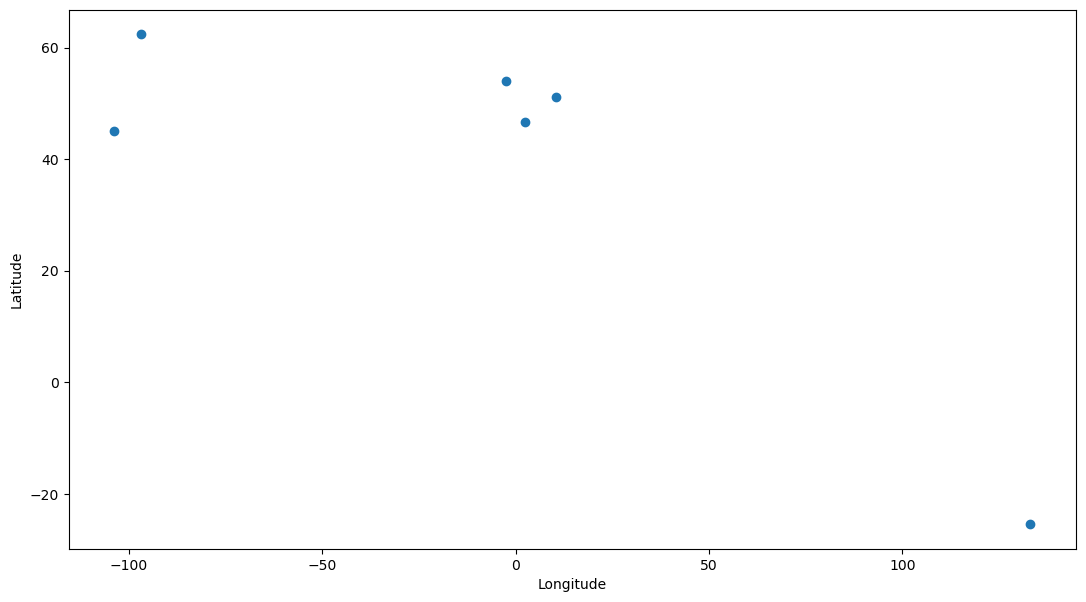

In [4]:
plt.figure(figsize=(13,7))
plt.scatter(country["Longitude"], country["Latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Performing K-means clustering on geographical coordinates

In [5]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=5)

In [6]:
kmeans.fit(country[['Latitude','Longitude']])

C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

# Adding CLUSTER LABEL to the dataset

In [7]:
country['Clusters'] = kmeans.predict(country[['Latitude','Longitude']])

In [8]:
country

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,3
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,4
5,Australia,-25.45,133.11,English,2


# Visualizing the clustering results

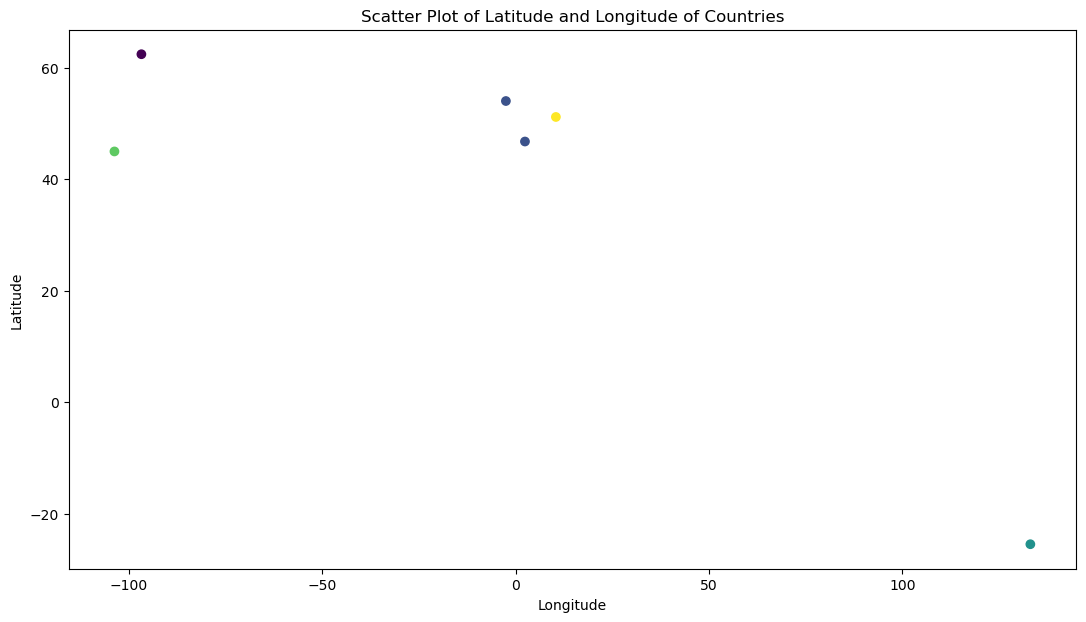

In [9]:


plt.figure(figsize=(13, 7))
plt.scatter(country['Longitude'], country['Latitude'],c=country['Clusters'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude of Countries')
plt.show()
     


# Determining the optimal number of clusters using the elbow method

In [10]:
WCSS = []
for k in range(2,6):
    kmeans= KMeans(n_clusters= k )
    kmeans.fit(country[['Longitude','Latitude']])
    WCSS.append(kmeans.inertia_)

C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [11]:
WCSS

# Within Cluster Sum of Square 

[13205.758119999999, 288.10523333333333, 111.91233333333332, 38.50624999999998]

# Plotting the within-cluster sum of squares (WCSS) for different values of K

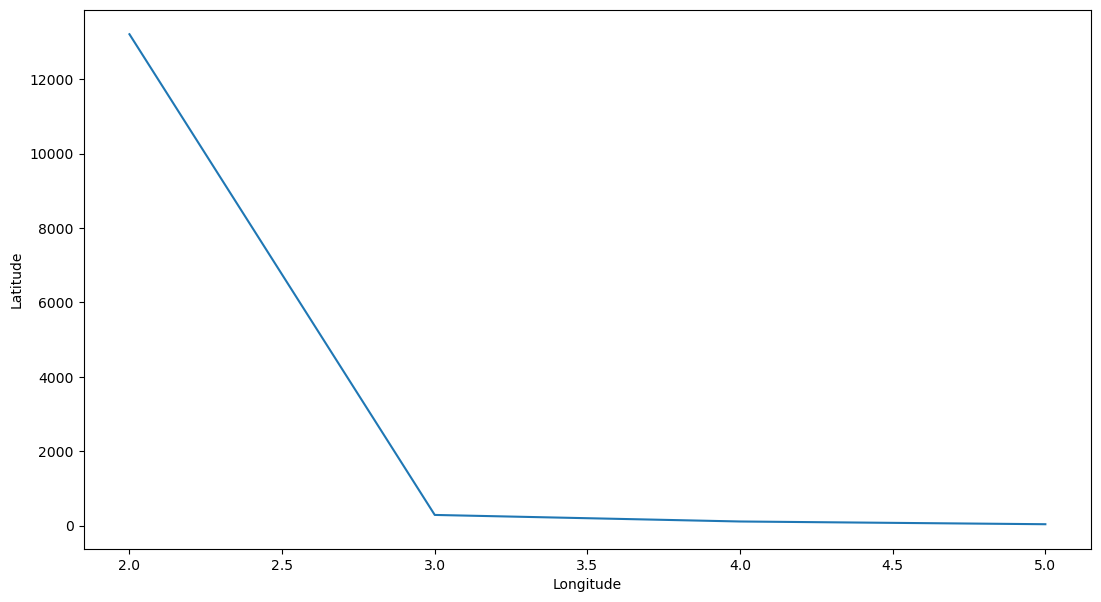

In [12]:
plt.figure(figsize=(13,7))
plt.plot(range(2,6),WCSS)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# to Find the number of best cluster s 

#  apply labe encoding to change of language of English 

# Encoding categorical feature 'Language' and performing clustering

In [13]:
country['Language'] =country['Language'].map({'English':1,'French':2,'German':3})

In [14]:
kmeans.fit(country[['Language']])

C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=5)

In [15]:
country['Clusters'] = kmeans.predict(country[['Language']])

In [16]:
country

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,1,0
1,Canada,62.40,-96.80,1,0
2,France,46.75,2.40,2,2
3,UK,54.01,-2.53,1,0
4,Germany,51.15,10.40,3,1
5,Australia,-25.45,133.11,1,0


# Visualizing the clustering results based on language

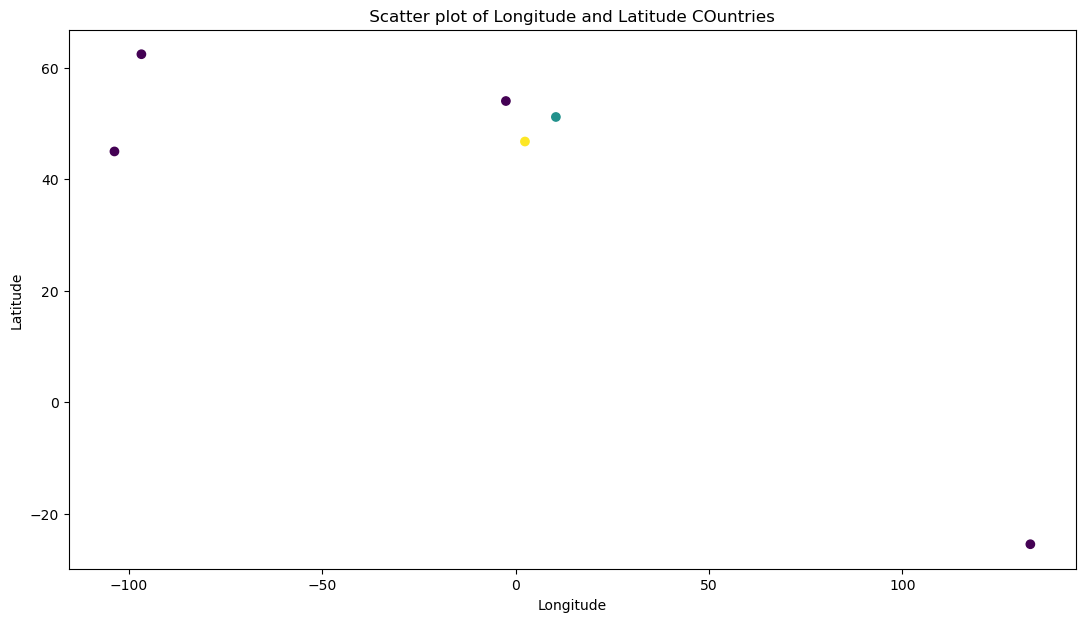

In [17]:
plt.figure(figsize=(13,7))
plt.scatter(country['Longitude'], country['Latitude'], c=country['Clusters'])
plt.title(' Scatter plot of Longitude and Latitude COuntries ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
